## Pymaceuticals Inc

In this study, 250 mice were treated through a variety of drug regimes over the course of 45 days. Their physiological responses were then monitored over the course of that time. We Analyze the data to show how four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.

Work Summary:

* Show how the tumor volume changes over time for each treatment.
* Show how the number of [metastatic](https://en.wikipedia.org/wiki/Metastasis) (cancer spreading) sites changes over time for each treatment.
* Shows the number of mice still alive through the course of treatment (Survival Rate)
* Compares the total % tumor volume change for each drug across the full 45 days.

#### Please excute all cells in order

In [99]:
import pandas as pd
import matplotlib.pylab as plt
plt.style.use('ggplot')

In [73]:
#Load Data Sets
clinicaltrial_data=pd.read_csv('raw_data/clinicaltrial_data.csv')
mouse_drug_data=pd.read_csv('raw_data/mouse_drug_data.csv')

In [74]:
#info 
clinicaltrial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
Mouse ID              1893 non-null object
Timepoint             1893 non-null int64
Tumor Volume (mm3)    1893 non-null float64
Metastatic Sites      1893 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 59.2+ KB


In [75]:
#info
mouse_drug_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
Mouse ID    250 non-null object
Drug        250 non-null object
dtypes: object(2)
memory usage: 4.0+ KB


In [76]:
clinicaltrial_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [77]:
mouse_drug_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [78]:
# selecting drugs needed for the study 
drugs=['Capomulin', 'Infubinol', 'Ketapril','Placebo']

# include only the drugs of interst 
mouse_drug_data=mouse_drug_data[mouse_drug_data['Drug'].isin(drugs)] 

In [79]:
mouse_drug_data['Drug'].value_counts()

Capomulin    25
Ketapril     25
Placebo      25
Infubinol    25
Name: Drug, dtype: int64

In [80]:
# mrg data sets 
clinicaltrial_drug=pd.merge(clinicaltrial_data, mouse_drug_data, how='inner', on='Mouse ID')
clinicaltrial_drug.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment 

Shows how the tumor volume changes over time for each treatment.

In [81]:
# calculating averages means 
Tumor_Vol_response_means=clinicaltrial_drug.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean()
Tumor_Vol_response_means.head()

Drug       Timepoint
Capomulin  0            45.000000
           5            44.266086
           10           43.084291
           15           42.064317
           20           40.716325
Name: Tumor Volume (mm3), dtype: float64

In [82]:
# Re arranges and pivot data - using ustack method
Tumor_Vol_response_means=Tumor_Vol_response_means.unstack('Drug')
means1=Tumor_Vol_response_means
means1

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


In [83]:
# clculating st error 
Tumor_Vol_response_sems=clinicaltrial_drug.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem()
Tumor_Vol_response_sems.head()


Drug       Timepoint
Capomulin  0            0.000000
           5            0.448593
           10           0.702684
           15           0.838617
           20           0.909731
Name: Tumor Volume (mm3), dtype: float64

In [84]:
# re-arrange data 
Tumor_Vol_response_sems=Tumor_Vol_response_sems.unstack('Drug')
sems1=Tumor_Vol_response_sems
sems1


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609
25,0.881642,0.550315,0.755413,1.034872
30,0.934460,0.631061,0.934121,1.218231
35,1.052241,0.984155,1.127867,1.287481
40,1.223608,1.055220,1.158449,1.370634


#### Tumor Response to Treatment plot

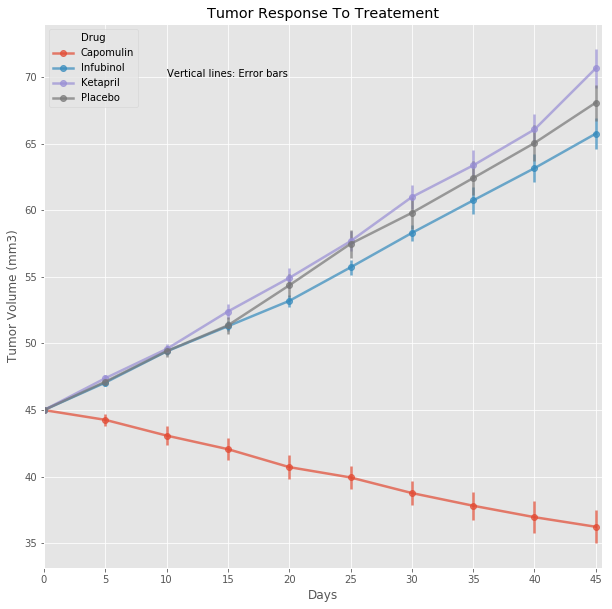

In [85]:
#% matplotlib inline
means1.plot(kind='line', linestyle='-', figsize=(10, 10), marker='o', linewidth=2.5, alpha=.7, legend=True, yerr=sems1);
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Days')
plt.title('Tumor Response To Treatement')
plt.annotate('Vertical lines: Error bars', xy=(10,70))
plt.xlim(0,45.5)
plt.xticks(np.arange(0,50,5))
plt.show();


## Metastatic Response to Treatment

Shows the number of metastatic (cancer spreading) sites changes over time for each treatment.

In [86]:
# recall mrgd data
clinicaltrial_drug.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [87]:
# calculating averages means 
Metastatic_Sites_means=clinicaltrial_drug.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean()
Metastatic_Sites_means.head()

Drug       Timepoint
Capomulin  0            0.000000
           5            0.160000
           10           0.320000
           15           0.375000
           20           0.652174
Name: Metastatic Sites, dtype: float64

In [88]:
Metastatic_Sites_means=Metastatic_Sites_means.unstack('Drug')
means2=Metastatic_Sites_means
means2

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


In [89]:
Metastatic_Sites_sems=clinicaltrial_drug.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem()
Metastatic_Sites_sems.head()

Drug       Timepoint
Capomulin  0            0.000000
           5            0.074833
           10           0.125433
           15           0.132048
           20           0.161621
Name: Metastatic Sites, dtype: float64

In [90]:
Metastatic_Sites_sems=Metastatic_Sites_sems.unstack('Drug')
sems2=Metastatic_Sites_sems
sems2

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064
25,0.181818,0.265753,0.288275,0.263888
30,0.172944,0.227823,0.347467,0.300264
35,0.169496,0.224733,0.361418,0.341412
40,0.175610,0.314466,0.315725,0.297294


#### Metastatic Response to Treatment Plot

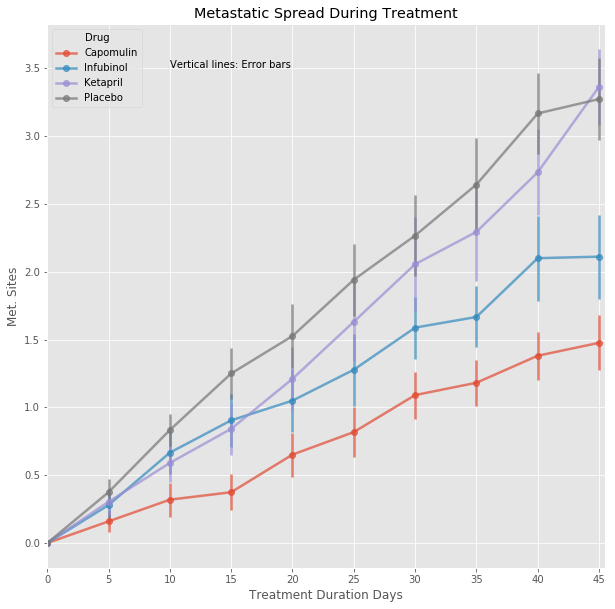

In [91]:
#% matplotlib inline
means2.plot(kind='line', linestyle='-', marker='o',figsize=(10, 10), linewidth=2.5, alpha=.7, legend=True, yerr=sems2);
plt.ylabel('Met. Sites')
plt.xlabel('Treatment Duration Days')
plt.title('Metastatic Spread During Treatment')
plt.annotate('Vertical lines: Error bars', xy=(10,3.5))
plt.xlim(0,45.5)
plt.xticks(np.arange(0,50,5))
plt.show();

## Survival Rates 

The number of mice still alive through the course of treatment (Survival Rate)

In [92]:
# calculating averages means 
Survival_rates=clinicaltrial_drug.groupby(['Drug', 'Timepoint'])['Mouse ID'].count()
Survival_rates.head()

Drug       Timepoint
Capomulin  0            25
           5            25
           10           25
           15           24
           20           23
Name: Mouse ID, dtype: int64

In [93]:
Survival_rates=Survival_rates.unstack('Drug')
Survival_rates


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19
25,22,18,19,17
30,22,17,18,15
35,22,12,17,14
40,21,10,15,12


In [94]:
#compute %
Survival_rates=Survival_rates/25*100

####  Survival Rates Plot

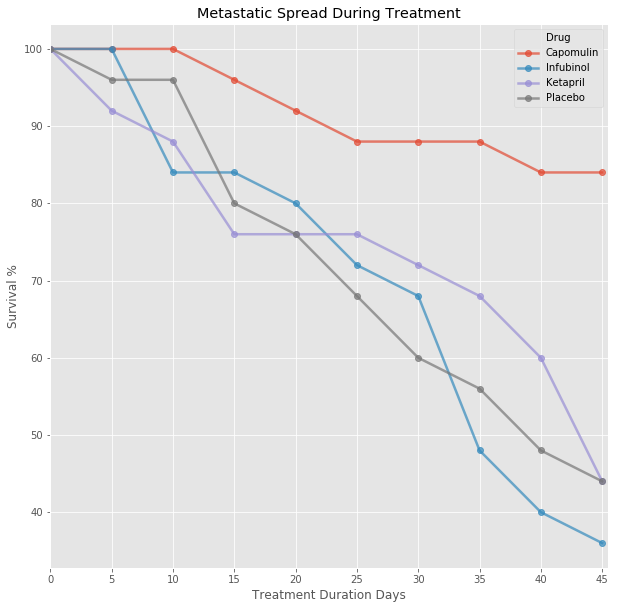

In [95]:
% matplotlib inline
Survival_rates.plot(kind='line', linestyle='-', marker='o',figsize=(10, 10), linewidth=2.5, alpha=.7, legend=True, grid=True);
plt.ylabel('Survival %')
plt.xlabel('Treatment Duration Days')
plt.title('Metastatic Spread During Treatment')
plt.xlim(0,45.5)
plt.xticks(np.arange(0,50,5))
plt.show();

## Total % tumor volume change 

Comparison of the total % tumor volume change for each drug across the full 45 days.

In [96]:
Tumor_Vol_Chg=Tumor_Vol_response_means.iloc[0:10:9]
Tumor_Vol_Chg=((Tumor_Vol_Chg.diff()/45*100).iloc[-1])

In [97]:
Tumor_Vol_Chg


Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
Name: 45, dtype: float64

#### Total % tumor volume change Plot


C:\Users\aerwe\Anaconda3\lib\site-packages\pandas\plotting\_core.py:178: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


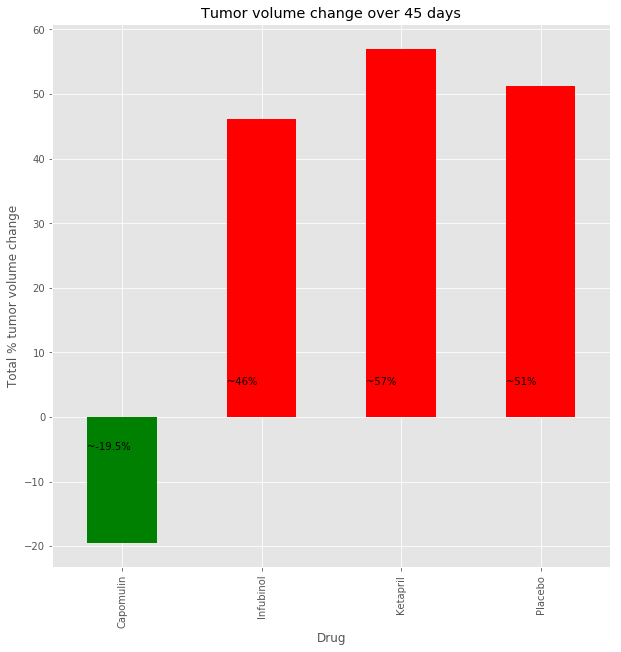

In [98]:
Tumor_Vol_Chg.plot('bar', colors=['green', 'red', 'red', 'red'], figsize=(10, 10) )
plt.annotate('~-19.5%', xy=(-.25,-5))
plt.annotate('~46%', xy=(.75,5))
plt.annotate('~57%', xy=(1.75,5))
plt.annotate('~51%', xy=(2.75,5))
plt.ylabel('Total % tumor volume change')
plt.title('Tumor volume change over 45 days')
plt.show();



# Summary

Data shows the best performing treatment is Capomulin. 
Every Mouse treated with Capomulin showed decreased Tumor volume over the duration of the study from 45 mm3 to less than 36 mm3 – the Tumor volume had increase for all other 3 treatments 
The standard error for the above observations was consistent for all treatments

Metastatic Spread During Treatment - positive for all treatments – Capomulin with the gentlest trend from 0 to 1.5 while other treatments showed more steeper trends, for example Ketapril showed trend of 0 to more than 3 at the end of the study 

Over all, the survival rate was decresing during the duration of the study. The best survival rate observed for those treated with  Capomulin ( with > 80% survival rate), while the worst survival rate was observed for Placebo treatment with only < 40% survival rate at the end of the study 

The study overall shows decrease of Tumor size by ~19% for the  Capomulin while all other treatments showed increase of Tumor size of about ~50% 
